In [2]:
import pandas as pd
import re


In [3]:

def extract_pad(well):
    # If well starts with 2 digits and 1 letter (e.g. '15W'), pad = '1' + digits (-> '115')
    m1 = re.match(r'^(\d{2})([A-Za-z])', well)
    if m1:
        return '1' + m1.group(1)
    # If well starts with 2 digits, 2 letters, and 1 digit (e.g. '7WP'), pad = '1' + digits (-> '107')
    m2 = re.match(r'^(\d)([A-Za-z]{2})', well)
    if m2:
        return '10' + m2.group(1)
    # If well starts with 2 digits, 1 letter, 1 letter, and 1 digit (e.g. '16W'), pad = '1' + digits (-> '116')
    m3 = re.match(r'^(\d{2})([A-Za-z]{1})', well)
    if m3:
        return '1' + m3.group(1)
    # If well starts with 3 digits (e.g. '106W13'), pad = those digits
    m4 = re.match(r'^(\d{3})', well)
    if m4:
        return m4.group(1)
    # Otherwise, fallback to first 3 chars
    return well[:3]

In [4]:

def filter_target_pads(df, target_pads=None):
    """
    Returns a DataFrame filtered to only include rows with pad in target_pads.
    Pads are strings, e.g. ['105', '106', '107', '108', '116']
    """
    if target_pads is None:
        target_pads = ['105', '106', '107', '108', '116']
    return df[df['pad'].astype(str).isin(target_pads)].reset_index(drop=True)


In [5]:
# Load the CSV file into a DataFrame
df_event_pg = pd.read_csv('well_event_pg_values.csv', parse_dates=['timestamp'])
df_event_pg['pad'] = df_event_pg['well'].apply(extract_pad)


In [6]:
df_event_pg['pad'].unique()

array(['101', '102', '103', '104', '109', '131', '105', '106', '107',
       '108', '118', '123', '110', '114', '115', '116', '117', '121'],
      dtype=object)

In [7]:

# Check the unique pads
print("Pads in data:", df_event_pg['pad'].unique())

# Create a dictionary of DataFrames, one per pad
pad_dfs = {}
for pad in df_event_pg['pad'].unique():
    pad_dfs[pad] = df_event_pg[df_event_pg['pad'] == pad].reset_index(drop=True)

# Example: show the first few rows for each pad
for pad, df in pad_dfs.items():
    print(f"\nPad: {pad}")
    print(df.head())

Pads in data: ['101' '102' '103' '104' '109' '131' '105' '106' '107' '108' '118' '123'
 '110' '114' '115' '116' '117' '121']

Pad: 101
   pad    well       event_type           timestamp  pad_pg_value
0  101  101N01  101N01 +2.16 hz 2025-08-11 23:37:00     -0.075807
1  101  101N01  101N01 +2.11 hz 2025-08-12 02:07:00    145.449478
2  101  101N01  101N01 +2.22 hz 2025-08-13 06:01:00    118.137741
3  101  101N01  101N01 +2.05 hz 2025-08-15 03:01:00    132.282852
4  101  101N01  101N01 +2.39 hz 2025-08-16 04:19:00      0.030052

Pad: 102
   pad    well       event_type           timestamp  pad_pg_value
0  102  102N01     102N01 start 2025-08-11 13:25:00    128.996918
1  102  102N07       102N07 NFE 2025-08-13 19:07:00    160.089569
2  102  102N07       102N07 NFE 2025-08-18 16:31:00     -0.075807
3  102  102N08       102N08 NFE 2025-08-15 14:31:00    124.948509
4  102  102N08  102N08 +7.96 hz 2025-08-16 08:01:00     -0.074377

Pad: 103
   pad    well       event_type           timestamp  

In [8]:
# Show a quick summary for each pad's DataFrame
for pad, df in pad_dfs.items():
    print(f"\nPad: {pad}")
    print(df.describe(include='all'))
    print(df.info())


Pad: 101
        pad    well       event_type                      timestamp  \
count    13      13               13                             13   
unique    1       4               13                            NaN   
top     101  101N01  101N01 +2.16 hz                            NaN   
freq     13       5                1                            NaN   
mean    NaN     NaN              NaN  2025-08-16 07:25:55.384615424   
min     NaN     NaN              NaN            2025-08-11 23:37:00   
25%     NaN     NaN              NaN            2025-08-15 00:37:00   
50%     NaN     NaN              NaN            2025-08-16 04:19:00   
75%     NaN     NaN              NaN            2025-08-19 09:55:00   
max     NaN     NaN              NaN            2025-08-20 10:37:00   
std     NaN     NaN              NaN                            NaN   

        pad_pg_value  
count      13.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean      102.358078  

In [9]:
df_target_pads = filter_target_pads(df_event_pg)
print("Pads in filtered data:", df_target_pads['pad'].unique())
print(df_target_pads.head())

Pads in filtered data: ['105' '106' '107' '108' '116']
   pad    well        event_type           timestamp  pad_pg_value
0  105  105N01        105N01 NFE 2025-08-16 13:55:00    136.892029
1  105  105N01  105N01 +15.98 hz 2025-08-16 19:49:00    144.495316
2  105  105N01       105N01 trip 2025-08-16 21:31:00    144.498169
3  105  105N01      105N01 start 2025-08-17 07:31:00    164.150833
4  105  105N01        105N01 NFE 2025-08-17 12:07:00    109.674698


In [10]:
# df_target_pads['pad'].describe()
# df_target_pads['well'].describe()
# df_target_pads['event_type'].describe()
df_target_pads['pad_pg_value'].describe()


count    248.000000
mean     113.296730
std       55.171213
min       -0.264637
25%      112.981377
50%      127.415466
75%      144.515697
max      197.576675
Name: pad_pg_value, dtype: float64

In [11]:
def estimate_well_pg_from_events(df_pad):
    """
    For a pad's event DataFrame (must include pad_pg_value), 
    estimate well-level PG by attributing PG delta between events to the well that triggered the event.
    Returns a DataFrame: pad, well, event_type, timestamp, delta_pg, pg_before, pg_after
    """
    results = []
    events = df_pad.sort_values('timestamp').reset_index(drop=True)
    for i, row in events.iterrows():
        well = row['well']
        event_type = row['event_type']
        ts = row['timestamp']
        pg_before = row['pad_pg_value']
        # Find PG value at next event (or None if last event)
        if i + 1 < len(events):
            pg_after = events.loc[i + 1, 'pad_pg_value']
        else:
            pg_after = None
        # Calculate delta PG (change in pad PG between events)
        delta_pg = pg_after - pg_before if pg_after is not None else None
        results.append({
            'pad': row['pad'],
            'well': well,
            'event_type': event_type,
            'timestamp': ts,
            'pg_before': pg_before,
            'pg_after': pg_after,
            'delta_pg': delta_pg
        })
    return pd.DataFrame(results)



In [12]:

# Apply for each pad in your filtered DataFrame
well_pg_records = []
for pad in df_target_pads['pad'].unique():
    df_pad_events = df_target_pads[df_target_pads['pad'] == pad].sort_values('timestamp').reset_index(drop=True)
    df_est_pg = estimate_well_pg_from_events(df_pad_events)
    well_pg_records.append(df_est_pg)

df_well_pg = pd.concat(well_pg_records).reset_index(drop=True)
print(df_well_pg.head())

# Save to CSV
df_well_pg.to_csv('estimated_well_pg.csv', index=False)
print("Saved estimated well PG values to estimated_well_pg.csv")


   pad    well    event_type           timestamp   pg_before    pg_after  \
0  105  105W03    105W03 NFE 2025-08-11 13:49:00  132.743500   -0.105848   
1  105  105W18  105W18 start 2025-08-11 16:31:00   -0.105848   -0.105848   
2  105  105W14  105W14 start 2025-08-11 16:31:00   -0.105848  118.695648   
3  105  105W14   105W14 trip 2025-08-11 17:07:00  118.695648  133.371109   
4  105  105W03   105W03 trip 2025-08-11 18:25:00  133.371109  150.343338   

     delta_pg  
0 -132.849348  
1    0.000000  
2  118.801496  
3   14.675461  
4   16.972229  


Saved estimated well PG values to estimated_well_pg.csv


In [13]:
df_well_pg.describe()

,timestamp,pg_before,pg_after,delta_pg
count,248,248.000000,243.000000,243.000000
mean,2025-08-15 17:05:05.322580480,113.296730,113.441053,0.977048
min,2025-08-11 06:01:00,-0.264637,-0.264637,-185.112432
25%,2025-08-12 22:26:30,112.981377,113.200970,-24.935631
50%,2025-08-15 19:43:00,127.415466,127.503448,0.000000
75%,2025-08-18 01:19:00,144.515697,144.533226,27.304588
max,2025-08-20 11:25:00,197.576675,197.576675,197.683954
std,NaN,55.171213,55.171329,79.550064


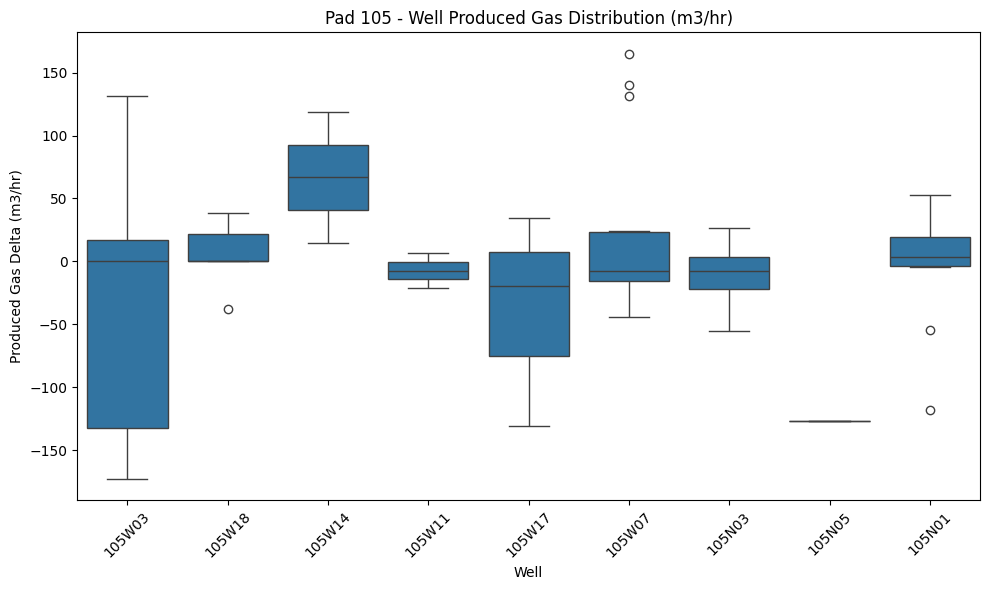


Pad 105 - Well PG Stats (m3/hr):
     well         min         max        mean
0  105N01 -118.535426   53.118576   -4.651664
1  105N03  -55.702095   26.384773  -11.128115
2  105N05 -126.763832 -126.763832 -126.763832
3  105W03 -172.734021  131.114087  -31.499411
4  105W07  -44.388016  165.203699   23.592965
5  105W11  -20.978767    6.467445   -7.255661
6  105W14   14.675461  118.801496   66.738479
7  105W17 -131.165595   34.555954  -38.829918
8  105W18  -37.718872   38.521393    4.468411


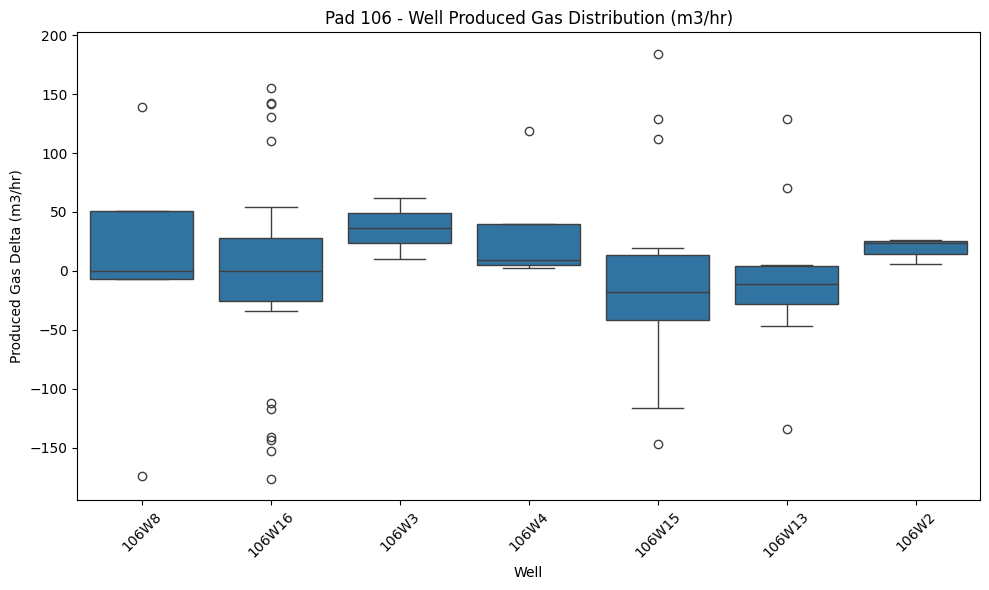


Pad 106 - Well PG Stats (m3/hr):
     well         min         max       mean
0  106W13 -133.970865  128.682192  -4.639346
1  106W15 -146.759832  184.358543  -2.434016
2  106W16 -176.082907  154.989690  -0.305054
3   106W2    5.613419   26.586472  18.711375
4   106W3   10.490097   62.073700  36.281898
5   106W4    2.088562  118.714239  34.951375
6   106W8 -174.323354  138.768884   1.676868


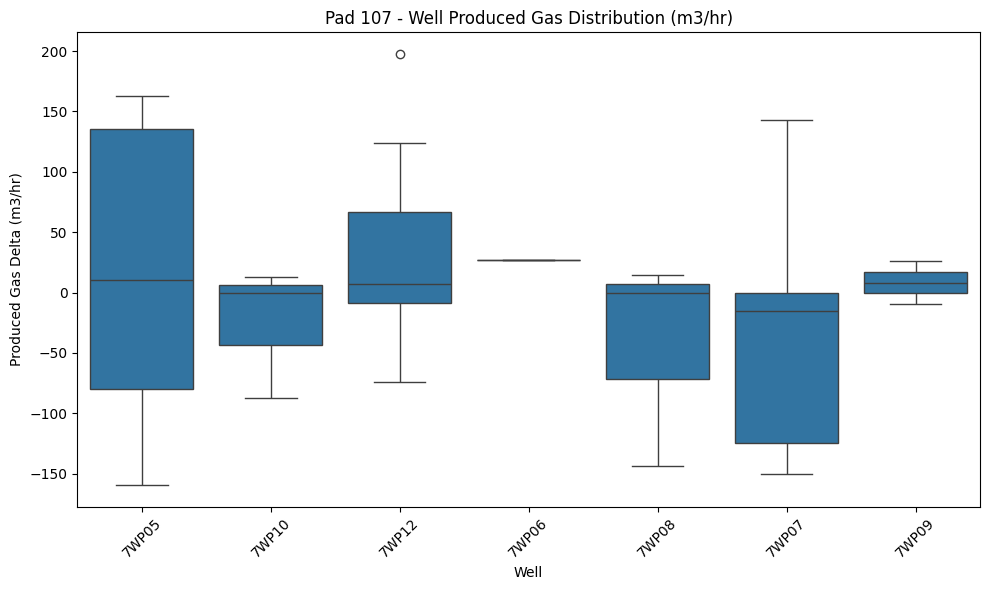


Pad 107 - Well PG Stats (m3/hr):
    well         min         max       mean
0  7WP05 -159.438635  163.165197  13.686390
1  7WP06   27.274551   27.274551  27.274551
2  7WP07 -150.673773  142.900269 -30.066152
3  7WP08 -143.911646   14.838936 -43.024237
4  7WP09   -9.832062   26.291748   8.229843
5  7WP10  -87.362663   13.065048 -24.765872
6  7WP12  -74.117355  197.683954  35.159646


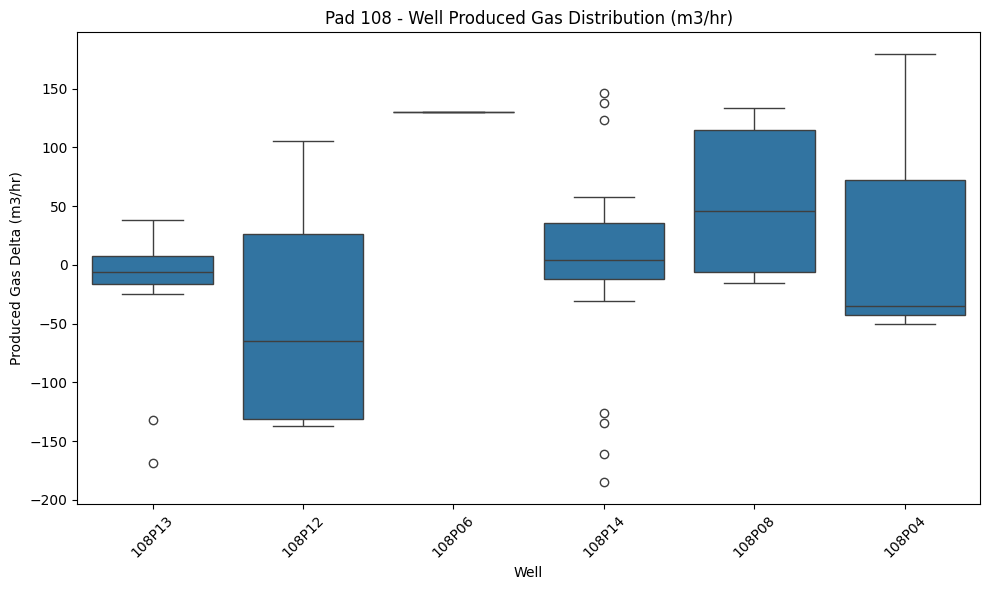


Pad 108 - Well PG Stats (m3/hr):
     well         min         max        mean
0  108P04  -50.410553  179.634923   31.410702
1  108P06  130.374516  130.374516  130.374516
2  108P08  -15.222321  133.071069   54.571984
3  108P12 -137.468529  105.587654  -40.247698
4  108P13 -168.631271   38.139458  -25.771838
5  108P14 -185.112432  145.911535   -2.890495


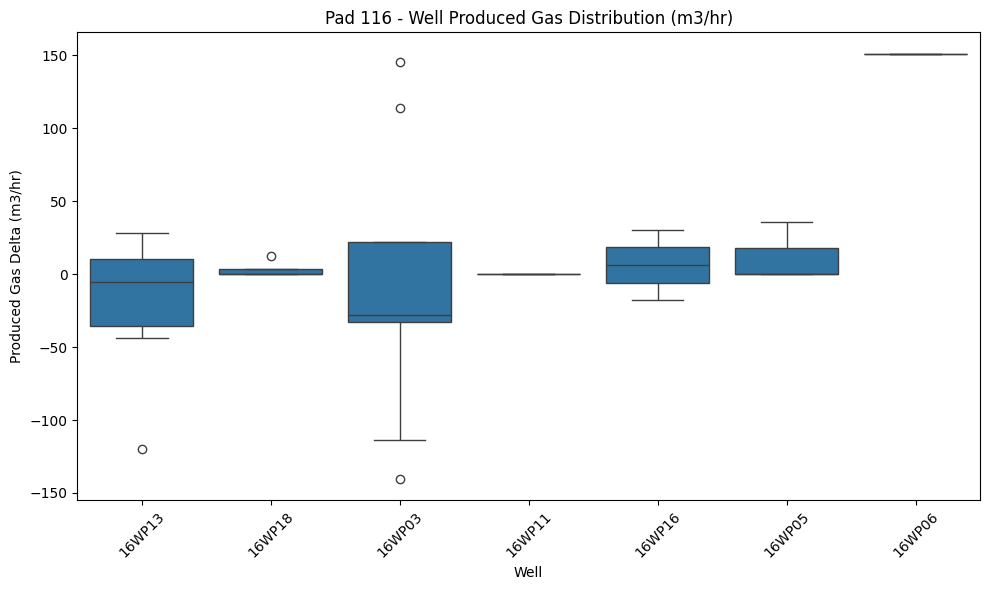


Pad 116 - Well PG Stats (m3/hr):
     well         min         max        mean
0  16WP03 -140.303839  145.315000   -5.319040
1  16WP05    0.000000   35.441467   11.850538
2  16WP06  151.118658  151.118658  151.118658
3  16WP11    0.000000    0.000000    0.000000
4  16WP13 -119.984547   28.227272  -22.178034
5  16WP16  -18.013283   30.494682    6.240700
6  16WP18    0.000000   12.703140    3.175785


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for each pad's wells
for pad in df_well_pg['pad'].unique():
    df_pad = df_well_pg[df_well_pg['pad'] == pad]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='well', y='delta_pg', data=df_pad)
    plt.title(f'Pad {pad} - Well Produced Gas Distribution (m3/hr)')
    plt.ylabel('Produced Gas Delta (m3/hr)')
    plt.xlabel('Well')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Table of min, max, avg for each well
    stats = df_pad.groupby('well')['delta_pg'].agg(['min', 'max', 'mean']).reset_index()
    print(f"\nPad {pad} - Well PG Stats (m3/hr):")
    print(stats)



In [15]:
# ...existing code...

def estimate_well_pg_actual(df_pad):
    """
    For each event, attribute the pad PG value to the well:
    - For 'trip' or 'NFE', use pg_before (well was producing)
    - For 'start', use pg_after (well is now producing)
    Returns a DataFrame: pad, well, event_type, timestamp, produced_gas_value
    """
    results = []
    events = df_pad.sort_values('timestamp').reset_index(drop=True)
    for i, row in events.iterrows():
        well = row['well']
        event_type = row['event_type'].lower()
        ts = row['timestamp']
        pg_before = row['pad_pg_value']
        pg_after = events.loc[i + 1, 'pad_pg_value'] if i + 1 < len(events) else None

        if 'trip' in event_type or 'nfe' in event_type:
            produced_gas = pg_before
        elif 'start' in event_type and pg_after is not None:
            produced_gas = pg_after
        else:
            produced_gas = None

        # Only keep positive produced_gas values
        if produced_gas is not None and produced_gas > 0:
            results.append({
                'pad': row['pad'],
                'well': well,
                'event_type': row['event_type'],
                'timestamp': ts,
                'produced_gas_value': produced_gas
            })
    return pd.DataFrame(results)

# Apply for each pad in your filtered DataFrame
well_pg_records = []
for pad in df_target_pads['pad'].unique():
    df_pad_events = df_target_pads[df_target_pads['pad'] == pad].sort_values('timestamp').reset_index(drop=True)
    df_est_pg = estimate_well_pg_actual(df_pad_events)
    well_pg_records.append(df_est_pg)

df_well_pg_actual = pd.concat(well_pg_records).reset_index(drop=True)
print(df_well_pg_actual.head())

# Save to CSV
df_well_pg_actual.to_csv('well_pg_actual.csv', index=False)
print("Saved well PG actual values to well_pg_actual.csv")

# ...existing code...

   pad    well    event_type           timestamp  produced_gas_value
0  105  105W03    105W03 NFE 2025-08-11 13:49:00          132.743500
1  105  105W14  105W14 start 2025-08-11 16:31:00          118.695648
2  105  105W14   105W14 trip 2025-08-11 17:07:00          118.695648
3  105  105W03   105W03 trip 2025-08-11 18:25:00          133.371109
4  105  105W18   105W18 trip 2025-08-11 18:31:00          150.343338
Saved well PG actual values to well_pg_actual.csv


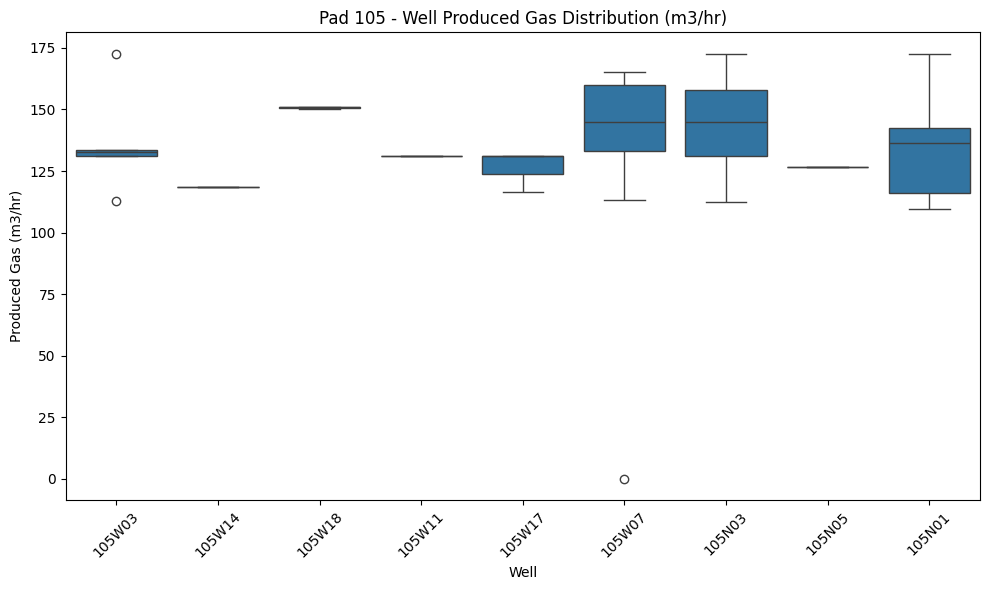


Pad 105 - Well PG Stats (m3/hr):
     well         min         max        mean
0  105N01  109.674698  172.616730  134.874499
1  105N03  112.572960  172.616730  143.832975
2  105N05  126.759552  126.759552  126.759552
3  105W03  112.624466  172.685394  136.497986
4  105W07    0.064385  165.073532  131.697479
5  105W11  131.065460  131.065460  131.065460
6  105W14  118.695648  118.695648  118.695648
7  105W17  116.554138  131.229980  126.338033
8  105W18  150.343338  151.145859  150.878352


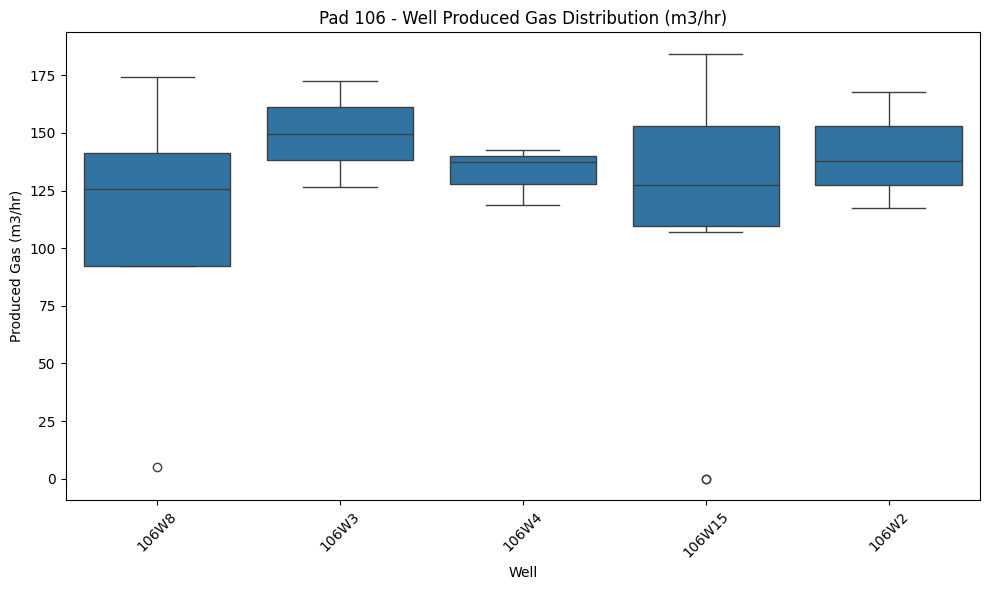


Pad 106 - Well PG Stats (m3/hr):
     well         min         max        mean
0  106W15    0.054371  184.422928  113.816097
1   106W2  117.412460  167.933167  141.016256
2   106W3  126.520660  172.685394  149.603027
3   106W4  118.611252  142.593628  132.797674
4   106W8    5.215735  174.248978  107.709512


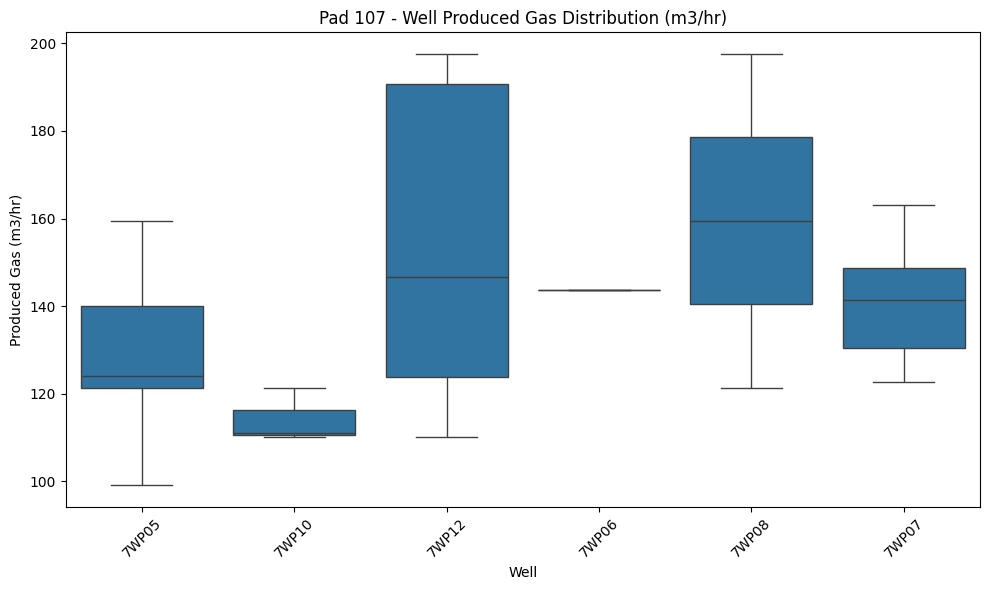


Pad 107 - Well PG Stats (m3/hr):
    well         min         max        mean
0  7WP05   99.187469  159.335648  129.696605
1  7WP06  143.775757  143.775757  143.775757
2  7WP07  122.626747  163.062210  141.093271
3  7WP08  121.377892  197.576675  159.477283
4  7WP10  110.214012  121.377892  114.221891
5  7WP12  110.214012  197.576675  153.782906


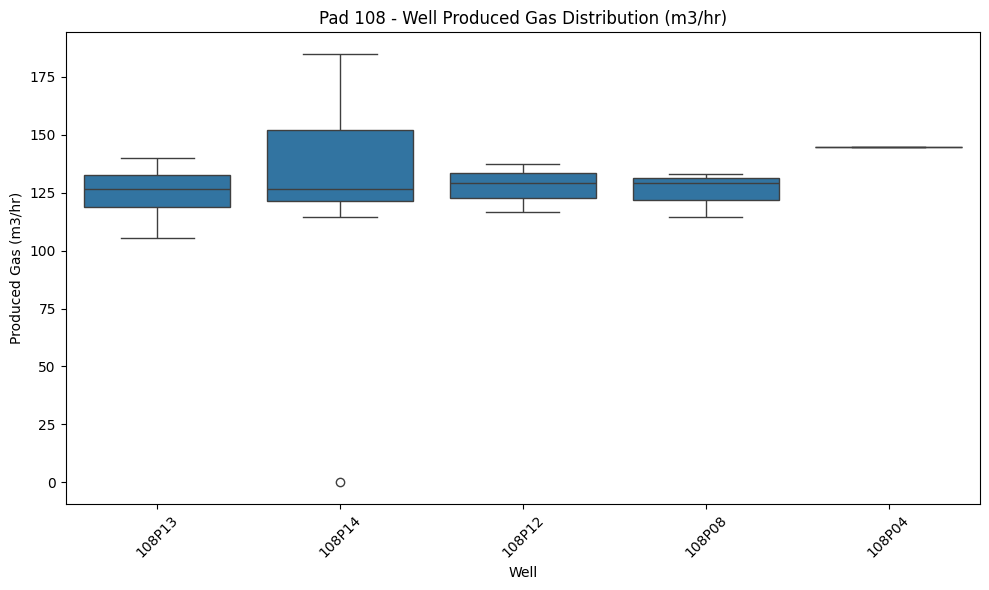


Pad 108 - Well PG Stats (m3/hr):
     well         min         max        mean
0  108P04  144.568283  144.568283  144.568283
1  108P08  114.644379  133.021011  125.670451
2  108P12  116.554138  137.475693  127.791931
3  108P13  105.350197  140.027771  124.913938
4  108P14    0.007164  185.015167  130.389781


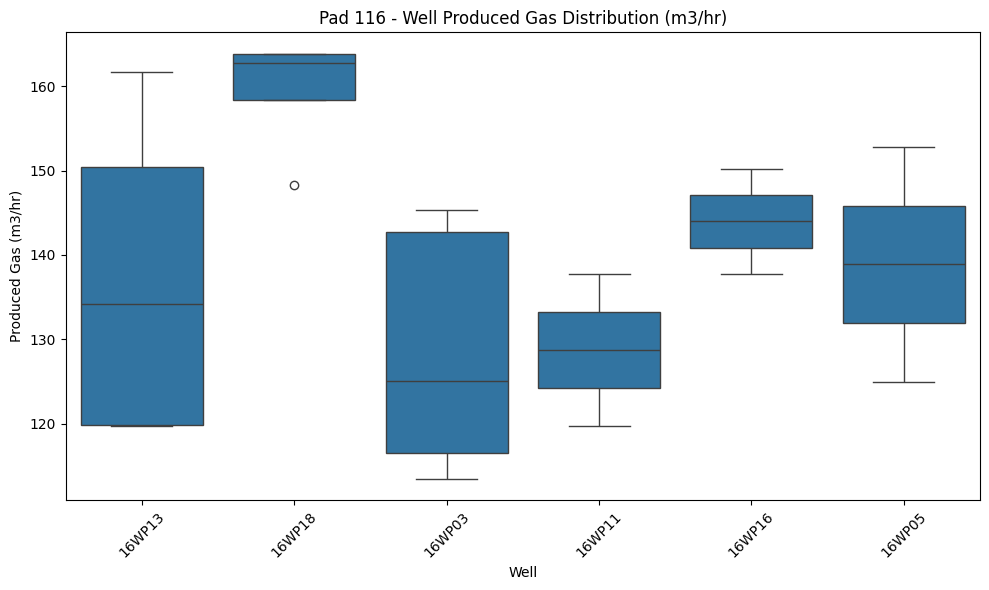


Pad 116 - Well PG Stats (m3/hr):
     well         min         max        mean
0  16WP03  113.488518  145.266373  128.896168
1  16WP05  124.948509  152.809586  138.879047
2  16WP11  119.721336  137.734619  128.727978
3  16WP13  119.719910  161.683167  136.782828
4  16WP16  137.734619  150.216019  143.975319
5  16WP18  148.327698  163.848999  159.427216


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for each pad's wells
for pad in df_well_pg_actual['pad'].unique():
    df_pad = df_well_pg_actual[df_well_pg_actual['pad'] == pad]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='well', y='produced_gas_value', data=df_pad)
    plt.title(f'Pad {pad} - Well Produced Gas Distribution (m3/hr)')
    plt.ylabel('Produced Gas (m3/hr)')
    plt.xlabel('Well')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Table of min, max, avg for each well
    stats = df_pad.groupby('well')['produced_gas_value'].agg(['min', 'max', 'mean']).reset_index()
    print(f"\nPad {pad} - Well PG Stats (m3/hr):")
    print(stats)



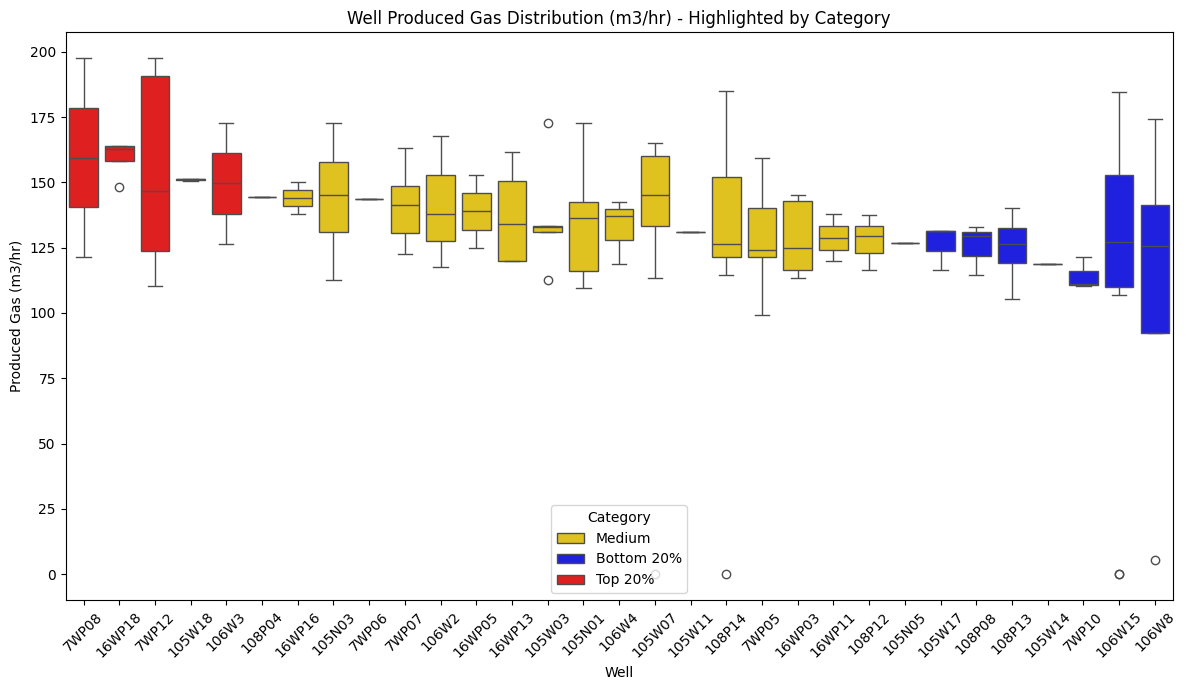

Well Produced Gas Stats by Category:
      well        mean         min         max    category
0    7WP08  159.477283  121.377892  197.576675     Top 20%
1   16WP18  159.427216  148.327698  163.848999     Top 20%
2    7WP12  153.782906  110.214012  197.576675     Top 20%
3   105W18  150.878352  150.343338  151.145859     Top 20%
4    106W3  149.603027  126.520660  172.685394     Top 20%
5   108P04  144.568283  144.568283  144.568283     Top 20%
6   16WP16  143.975319  137.734619  150.216019      Medium
7   105N03  143.832975  112.572960  172.616730      Medium
8    7WP06  143.775757  143.775757  143.775757      Medium
9    7WP07  141.093271  122.626747  163.062210      Medium
10   106W2  141.016256  117.412460  167.933167      Medium
11  16WP05  138.879047  124.948509  152.809586      Medium
12  16WP13  136.782828  119.719910  161.683167      Medium
13  105W03  136.497986  112.624466  172.685394      Medium
14  105N01  134.874499  109.674698  172.616730      Medium
15   106W4  132.797

In [17]:
# ...existing code...

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average produced gas for each well across all pads
well_stats = df_well_pg_actual.groupby('well')['produced_gas_value'].agg(['mean', 'min', 'max']).reset_index()

# Rank wells by average produced gas
well_stats = well_stats.sort_values('mean', ascending=False).reset_index(drop=True)
well_stats['rank'] = well_stats['mean'].rank(method='first', ascending=False)

# Determine cutoffs for top 20%, middle 60%, bottom 20%
n_wells = len(well_stats)
top_cutoff = int(n_wells * 0.2)
bottom_cutoff = int(n_wells * 0.8)

well_stats['category'] = 'Medium'
well_stats.loc[:top_cutoff-1, 'category'] = 'Top 20%'
well_stats.loc[bottom_cutoff:, 'category'] = 'Bottom 20%'

# Visual: Boxplot with color by category
plt.figure(figsize=(12, 7))
order = well_stats['well']
palette = {'Top 20%': 'red', 'Medium': 'gold', 'Bottom 20%': 'blue'}
well_cat_map = dict(zip(well_stats['well'], well_stats['category']))
df_well_pg_actual['category'] = df_well_pg_actual['well'].map(well_cat_map)

sns.boxplot(x='well', y='produced_gas_value', data=df_well_pg_actual, order=order, hue='category', dodge=False, palette=palette)
plt.title('Well Produced Gas Distribution (m3/hr) - Highlighted by Category')
plt.ylabel('Produced Gas (m3/hr)')
plt.xlabel('Well')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

# Table: Well, average, min, max, category
print("Well Produced Gas Stats by Category:")
print(well_stats[['well', 'mean', 'min', 'max', 'category']])

# ...existing code...

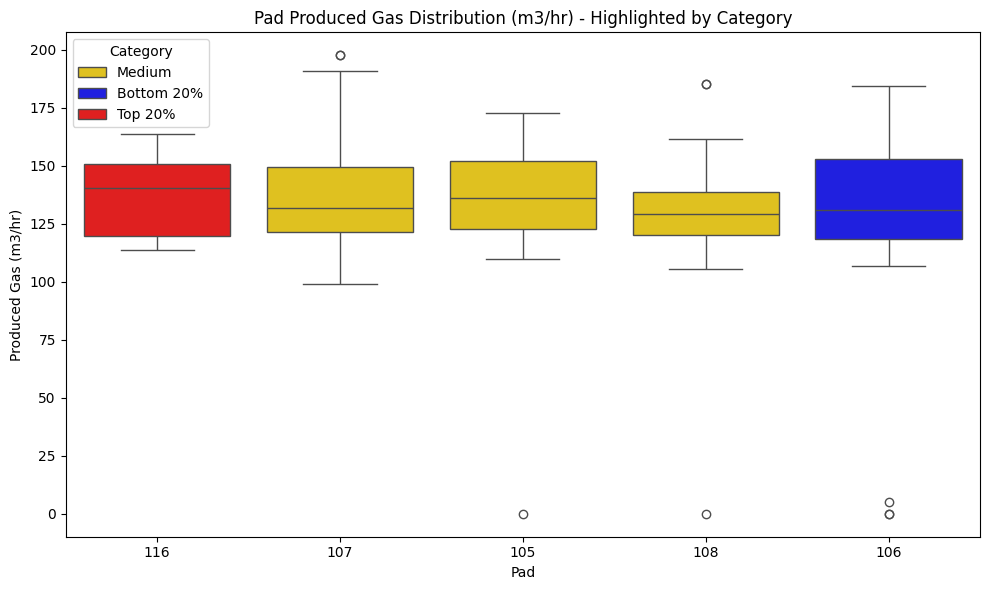

Pad Produced Gas Stats by Category:
   pad        mean         min         max    category
0  116  138.427987  113.488518  163.848999     Top 20%
1  107  138.005369   99.187469  197.576675      Medium
2  105  134.597402    0.064385  172.685394      Medium
3  108  128.938777    0.007164  185.015167      Medium
4  106  122.256675    0.054371  184.422928  Bottom 20%


In [18]:
# ...existing code...

# Rank pads by average produced gas across all wells/events
pad_stats = df_well_pg_actual.groupby('pad')['produced_gas_value'].agg(['mean', 'min', 'max']).reset_index()
pad_stats = pad_stats.sort_values('mean', ascending=False).reset_index(drop=True)
pad_stats['rank'] = pad_stats['mean'].rank(method='first', ascending=False)

# Categorize pads: top 20%, middle 60%, bottom 20%
n_pads = len(pad_stats)
top_cutoff = int(n_pads * 0.2)
bottom_cutoff = int(n_pads * 0.8)

pad_stats['category'] = 'Medium'
pad_stats.loc[:top_cutoff-1, 'category'] = 'Top 20%'
pad_stats.loc[bottom_cutoff:, 'category'] = 'Bottom 20%'

# Visual: Boxplot for pads, colored by category
plt.figure(figsize=(10, 6))
order = pad_stats['pad']
palette = {'Top 20%': 'red', 'Medium': 'gold', 'Bottom 20%': 'blue'}
pad_cat_map = dict(zip(pad_stats['pad'], pad_stats['category']))
df_well_pg_actual['pad_category'] = df_well_pg_actual['pad'].map(pad_cat_map)

sns.boxplot(x='pad', y='produced_gas_value', data=df_well_pg_actual, order=order, hue='pad_category', dodge=False, palette=palette)
plt.title('Pad Produced Gas Distribution (m3/hr) - Highlighted by Category')
plt.ylabel('Produced Gas (m3/hr)')
plt.xlabel('Pad')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

# Table: Pad, average, min, max, category
print("Pad Produced Gas Stats by Category:")
print(pad_stats[['pad', 'mean', 'min', 'max', 'category']])

# ...existing code...

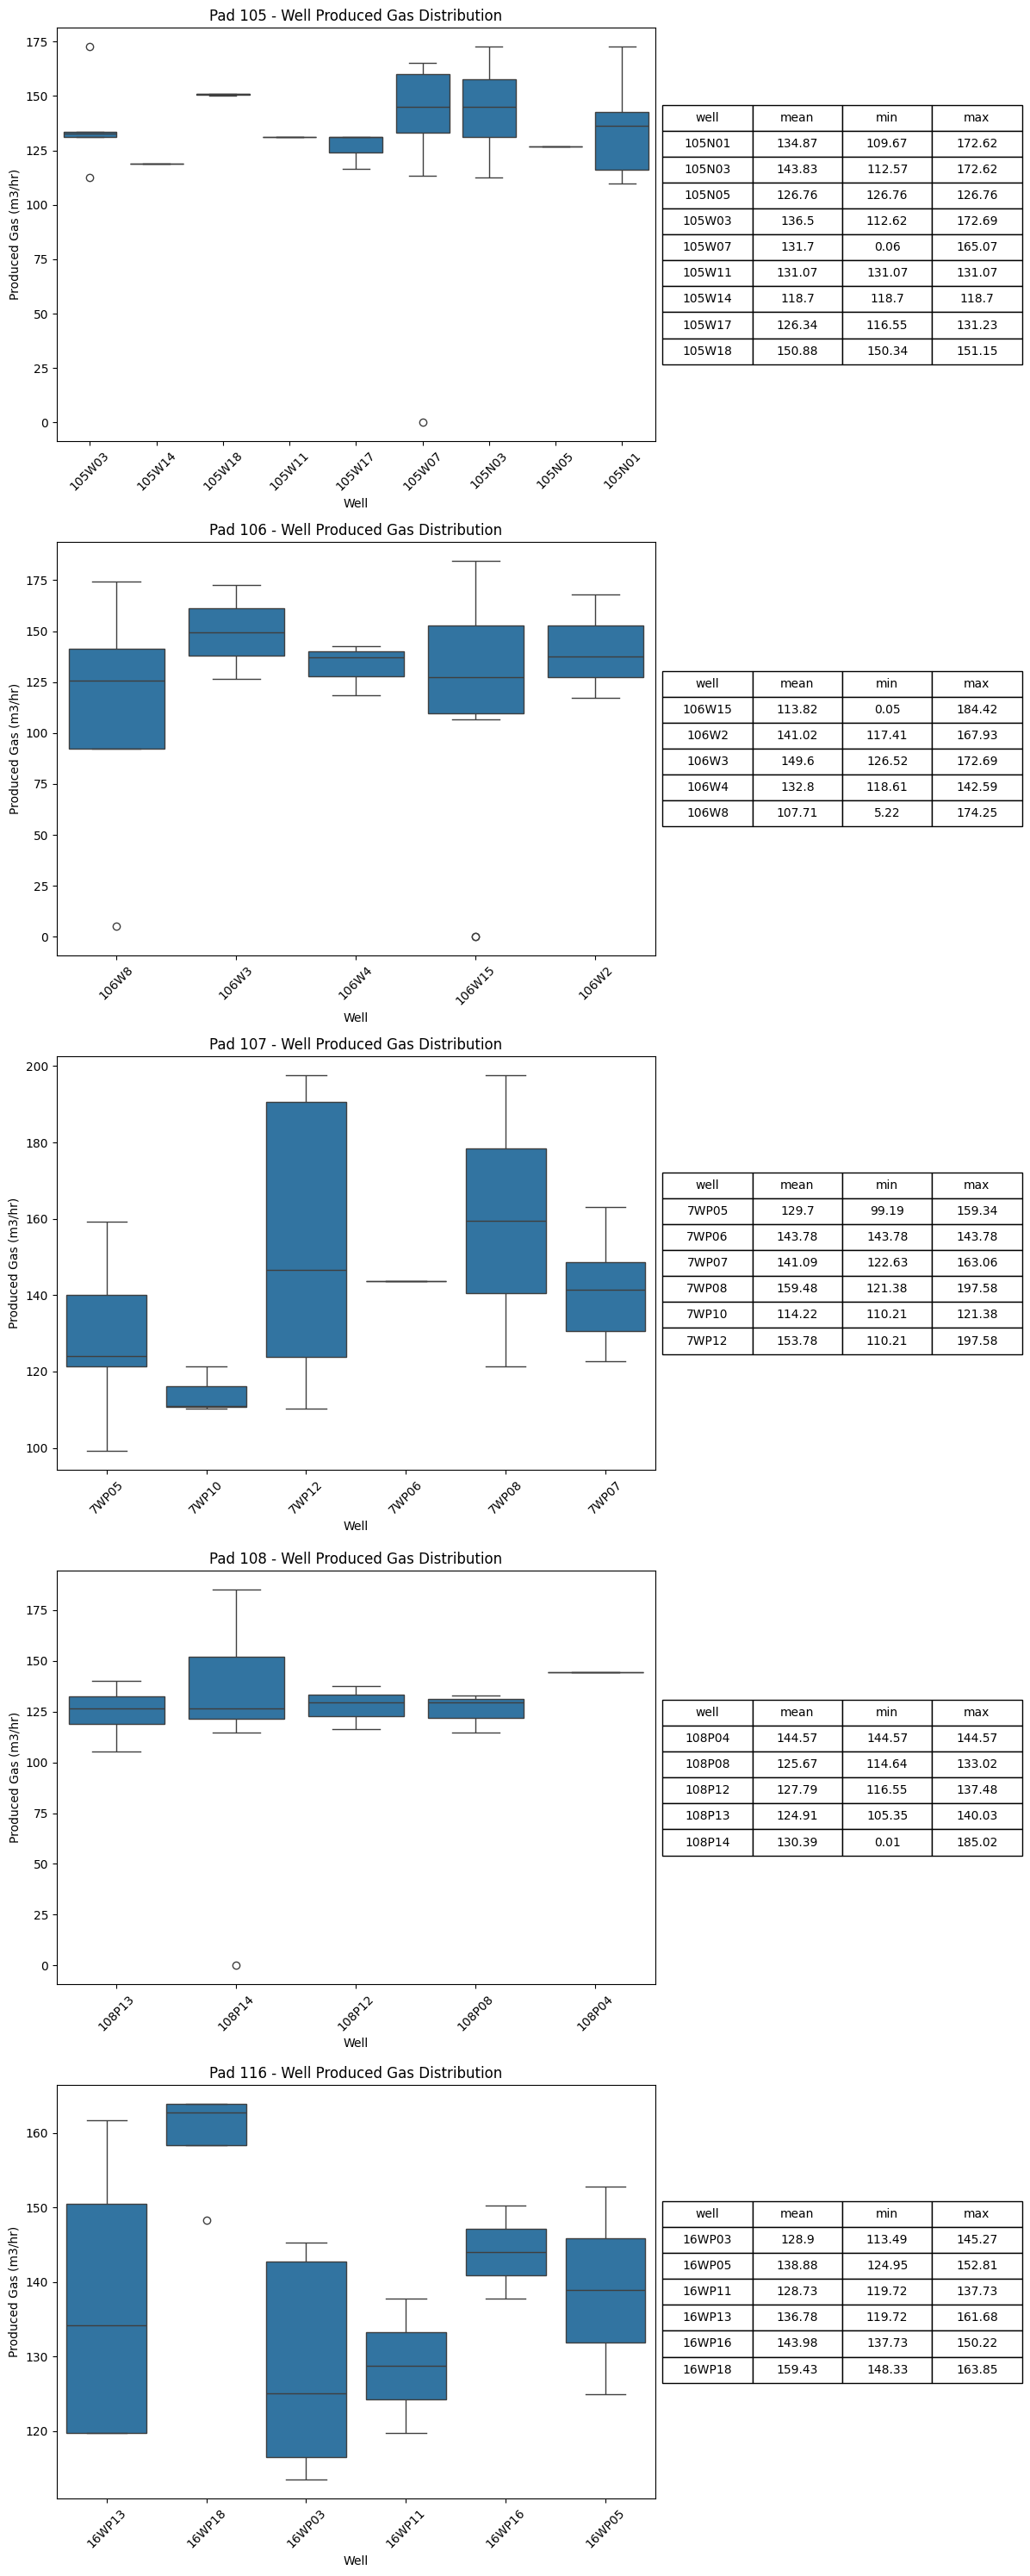

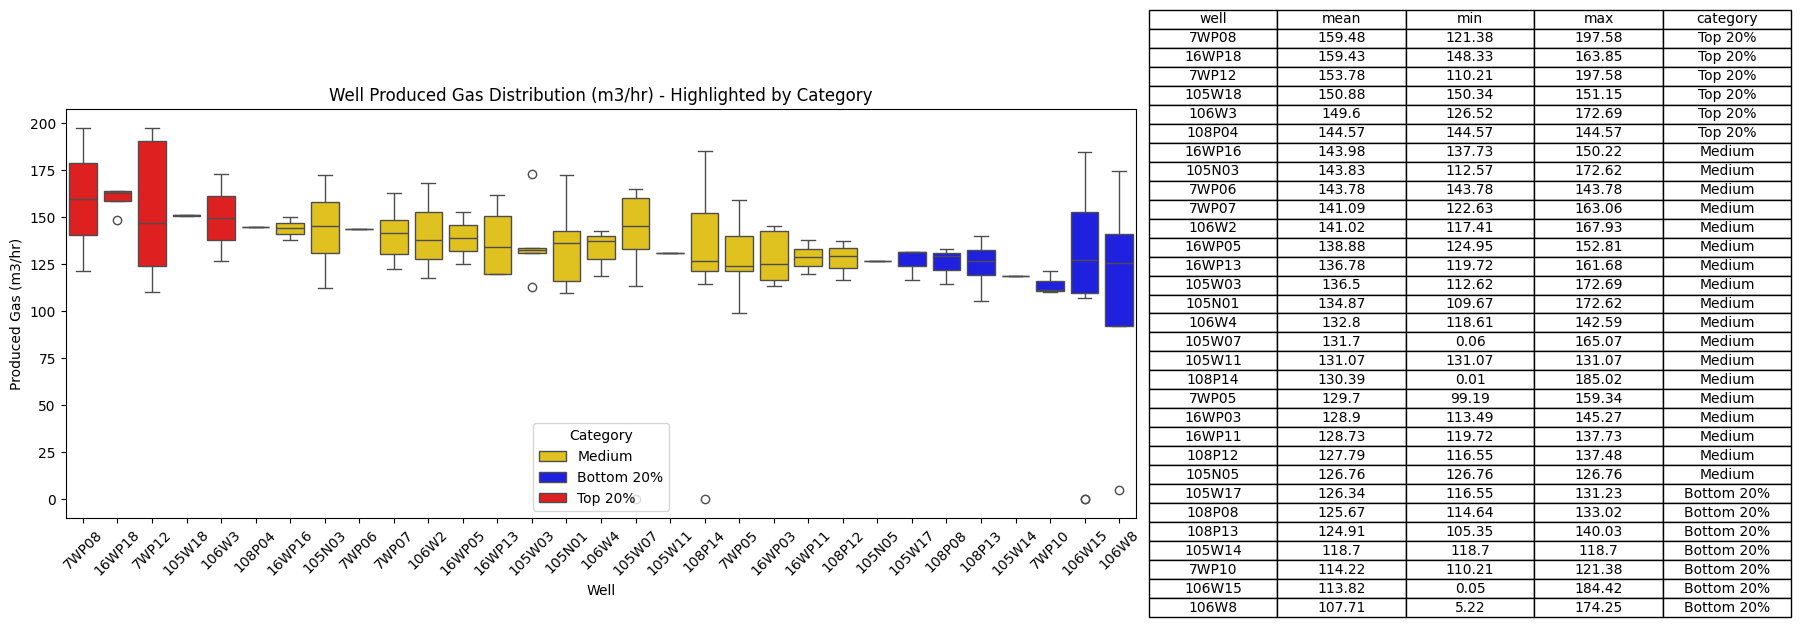

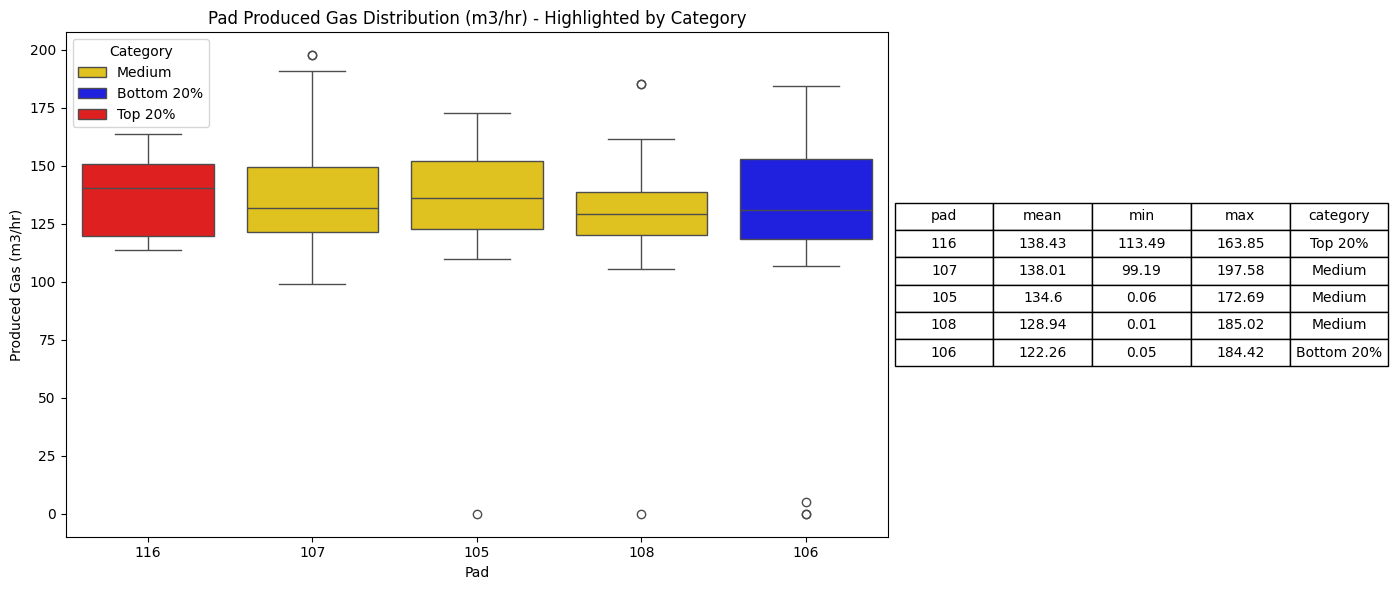

In [21]:
# ...existing code...

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Well Produced Gas Distribution for each pad (side by side, table beside plot)
pad_list = df_well_pg_actual['pad'].unique()
n_pads = len(pad_list)
fig, axes = plt.subplots(n_pads, 2, figsize=(12, 6 * n_pads), gridspec_kw={'width_ratios': [2, 1]})

for i, pad in enumerate(pad_list):
    df_pad = df_well_pg_actual[df_well_pg_actual['pad'] == pad]
    # Boxplot
    sns.boxplot(x='well', y='produced_gas_value', data=df_pad, ax=axes[i, 0])
    axes[i, 0].set_title(f'Pad {pad} - Well Produced Gas Distribution')
    axes[i, 0].set_ylabel('Produced Gas (m3/hr)')
    axes[i, 0].set_xlabel('Well')
    axes[i, 0].tick_params(axis='x', rotation=45)
    # Table
    stats = df_pad.groupby('well')['produced_gas_value'].agg(['mean', 'min', 'max']).reset_index()
    stats = stats.round(2)  # Round to 2 decimals
    axes[i, 1].axis('off')
    table = axes[i, 1].table(cellText=stats.values,
                             colLabels=stats.columns,
                             loc='center',
                             cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)  # Slightly wider cells for readability

plt.tight_layout()
plt.show()

# 2. Well Produced Gas Distribution - Highlighted by Category (visual + table)
well_stats = df_well_pg_actual.groupby('well')['produced_gas_value'].agg(['mean', 'min', 'max']).reset_index()
well_stats = well_stats.sort_values('mean', ascending=False).reset_index(drop=True)
well_stats = well_stats.round(2)
n_wells = len(well_stats)
top_cutoff = int(n_wells * 0.2)
bottom_cutoff = int(n_wells * 0.8)
well_stats['category'] = 'Medium'
well_stats.loc[:top_cutoff-1, 'category'] = 'Top 20%'
well_stats.loc[bottom_cutoff:, 'category'] = 'Bottom 20%'
well_cat_map = dict(zip(well_stats['well'], well_stats['category']))
df_well_pg_actual['category'] = df_well_pg_actual['well'].map(well_cat_map)

fig, axes = plt.subplots(1, 2, figsize=(18, 7), gridspec_kw={'width_ratios': [2, 1]})
palette = {'Top 20%': 'red', 'Medium': 'gold', 'Bottom 20%': 'blue'}
order = well_stats['well']
sns.boxplot(x='well', y='produced_gas_value', data=df_well_pg_actual, order=order, hue='category', dodge=False, palette=palette, ax=axes[0])
axes[0].set_title('Well Produced Gas Distribution (m3/hr) - Highlighted by Category')
axes[0].set_ylabel('Produced Gas (m3/hr)')
axes[0].set_xlabel('Well')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Category')
# Table
table = axes[1].table(cellText=well_stats[['well', 'mean', 'min', 'max', 'category']].values,
                      colLabels=['well', 'mean', 'min', 'max', 'category'],
                      loc='center',
                      cellLoc='center')
axes[1].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.tight_layout()
plt.show()

# 3. Pad Produced Gas Distribution - Highlighted by Category (visual + table)
pad_stats = df_well_pg_actual.groupby('pad')['produced_gas_value'].agg(['mean', 'min', 'max']).reset_index()
pad_stats = pad_stats.sort_values('mean', ascending=False).reset_index(drop=True)
pad_stats = pad_stats.round(2)
n_pads = len(pad_stats)
top_cutoff = int(n_pads * 0.2)
bottom_cutoff = int(n_pads * 0.8)
pad_stats['category'] = 'Medium'
pad_stats.loc[:top_cutoff-1, 'category'] = 'Top 20%'
pad_stats.loc[bottom_cutoff:, 'category'] = 'Bottom 20%'
pad_cat_map = dict(zip(pad_stats['pad'], pad_stats['category']))
df_well_pg_actual['pad_category'] = df_well_pg_actual['pad'].map(pad_cat_map)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})
palette = {'Top 20%': 'red', 'Medium': 'gold', 'Bottom 20%': 'blue'}
order = pad_stats['pad']
sns.boxplot(x='pad', y='produced_gas_value', data=df_well_pg_actual, order=order, hue='pad_category', dodge=False, palette=palette, ax=axes[0])
axes[0].set_title('Pad Produced Gas Distribution (m3/hr) - Highlighted by Category')
axes[0].set_ylabel('Produced Gas (m3/hr)')
axes[0].set_xlabel('Pad')
axes[0].legend(title='Category')
# Table
table = axes[1].table(cellText=pad_stats[['pad', 'mean', 'min', 'max', 'category']].values,
                      colLabels=['pad', 'mean', 'min', 'max', 'category'],
                      loc='center',
                      cellLoc='center')
axes[1].axis('off')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.tight_layout()
plt.show()

# ...existing code...

TODO: 
- clean up/ organize
- do 6 months of data 
- make sure values are correct